In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, MaxPooling2D, Add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.regularizers import l2, l1

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

## Melspec

In [39]:

training_set_melspec = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

val_set_melspec = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5517 images belonging to 6 classes.
Found 1169 images belonging to 6 classes.


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    
    # Convolutional Layer 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))


    
    # Flatten Layer
    model.add(layers.Flatten())
    
    # Fully Connected Layer 1
    model.add(layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(6, activation='softmax'))  # Ganti 10 dengan jumlah kelas yang sesuai
    
    return model

# Membuat model
model_melspec = create_model()

In [41]:
# Define the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with SGD
model_melspec.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display the model summary
model_melspec.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 63, 63, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,258,566 (73.47 MB)

 Trainable params: 19,258,566 (73.47 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from keras.callbacks import History
history=History()
history_melspec = model_melspec.fit(training_set_melspec, validation_data = val_set_melspec, batch_size=32,epochs=50,callbacks=[history])

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 96s 521ms/step - accuracy: 0.4464 - loss: 2.3408 - val_accuracy: 0.5808 - val_loss: 1.3859
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.6169 - loss: 1.2739 - val_accuracy: 0.6193 - val_loss: 1.3159
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 265ms/step - accuracy: 0.6573 - loss: 1.1859 - val_accuracy: 0.6886 - val_loss: 1.0896
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 270ms/step - accuracy: 0.6936 - loss: 1.0876 - val_accuracy: 0.7622 - val_loss: 0.9130
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 270ms/step - accuracy: 0.7165 - loss: 1.0240 - val_accuracy: 0.6920 - val_loss: 1.0970
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 270ms/step - accuracy: 0.7289 - loss: 1.0025 - val_accuracy: 0.7049 - val_loss: 1.0198
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 268ms/step - accuracy: 0.7372 - loss: 0.9869 - val_accuracy: 0.7040 - val_loss: 1.0358
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 263ms/step - accuracy: 0.7367 - loss: 0

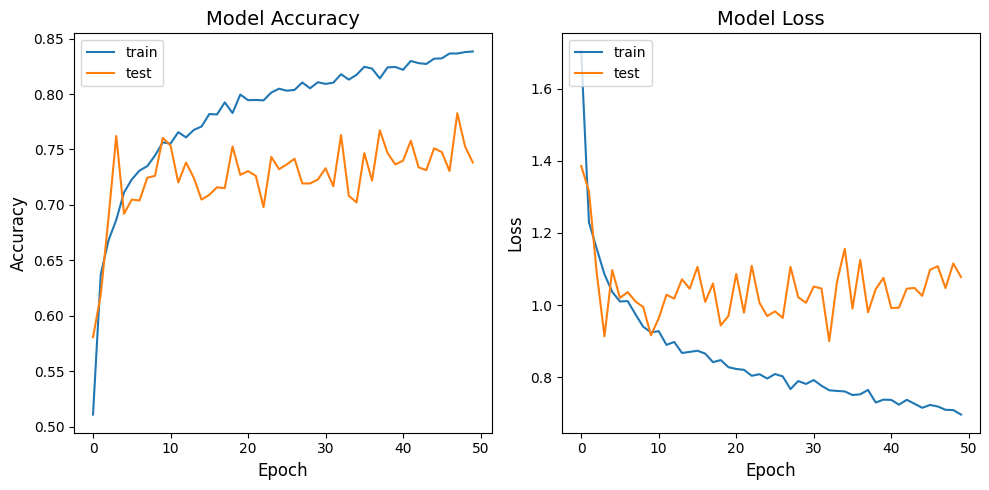

In [43]:
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot akurasi
ax1.plot(history_melspec.history['accuracy'], label='train')
ax1.plot(history_melspec.history['val_accuracy'], label='test')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(loc='upper left')

# Plot loss
ax2.plot(history_melspec.history['loss'], label='train')
ax2.plot(history_melspec.history['val_loss'], label='test')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.7911 - loss: 0.9143
n Test_Accuracy:- 0.7382377982139587
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step
confusion matrix
[[182  16  21   2   1   0]
 [ 10 167  18   1   1   1]
 [ 73  16 182   3  11   5]
 [  2  17   4 246   8   0]
 [  2   0   2   7  63   0]
 [ 20  13  50   1   1  23]]


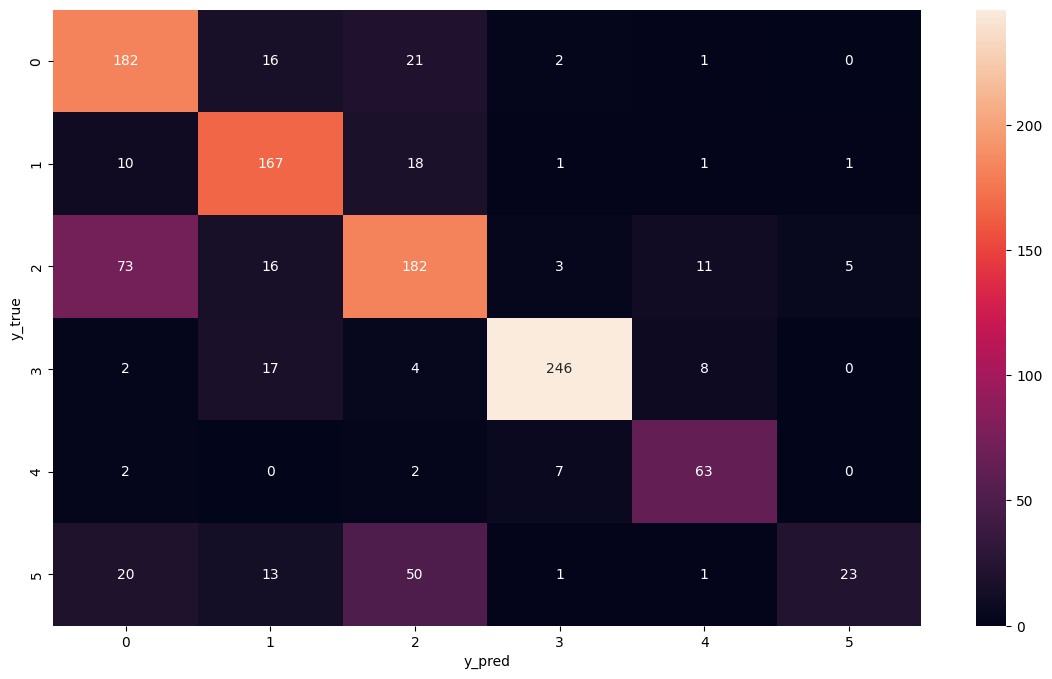

In [44]:
accuracy = model_melspec.evaluate(val_set_melspec)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model_melspec.predict(val_set_melspec)
y_pred = np.argmax(pred, axis=1)

#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(val_set_melspec.classes, y_pred))

    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(val_set_melspec.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Coba dengan data tes

In [45]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set_melspec = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1218 images belonging to 6 classes.


 1/39 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.7500 - loss: 0.9770

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 380ms/step - accuracy: 0.7815 - loss: 0.9264
n Test_Accuracy:- 0.7898193597793579
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step
confusion matrix
[[178  28  40   1   3   6]
 [ 20  84   8   5   2   4]
 [ 17  10 350   1   0   4]
 [  1   1   1 238   2   3]
 [  1   1   2   8  77   1]
 [ 24  29  30   0   3  35]]


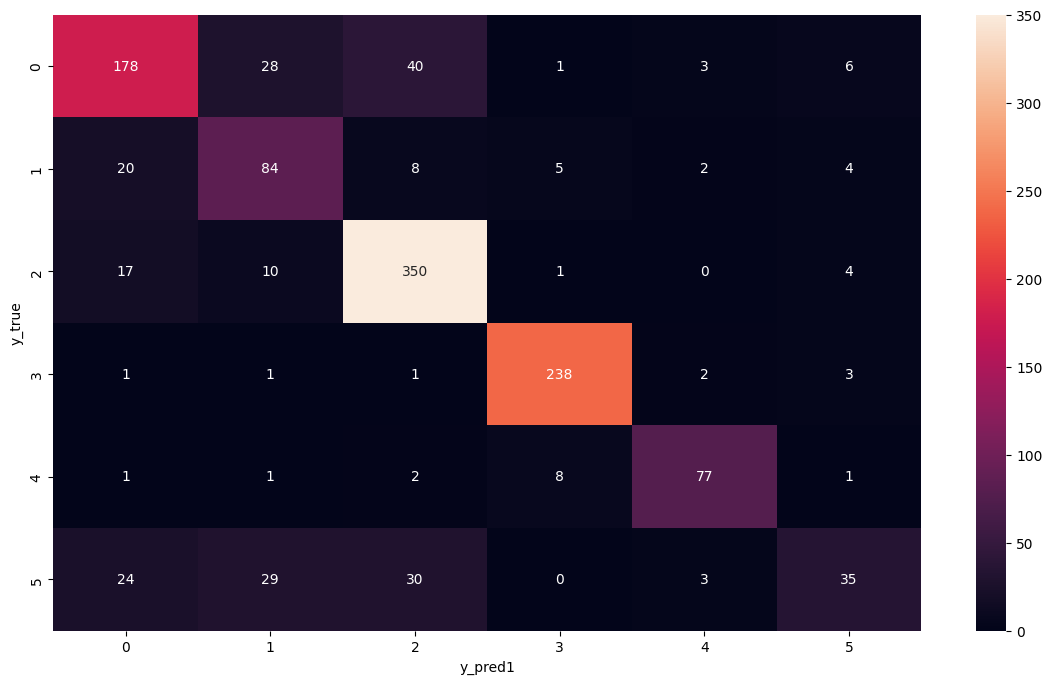

In [46]:
accuracy = model_melspec.evaluate(test_set_melspec)
print('n', 'Test_Accuracy:-', accuracy[1])
pred1 = model_melspec.predict(test_set_melspec)
y_pred1 = np.argmax(pred1, axis=1)
#y_true = np.argmax(pred1, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set_melspec.classes, y_pred1))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set_melspec.classes, y_pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred1")
plt.ylabel("y_true")
plt.show()

In [47]:
import pickle, os

os.makedirs("model_output", exist_ok = True)
pickle.dump(model_melspec, open("/kaggle/working/cnn_melspec.pkl", "wb"))

In [48]:
# Save the model
model_save_path = '/kaggle/working/cnn_melspec.h5'  # Change this path as needed
model_melspec.save(model_save_path)

print(f'Model saved to {model_save_path}')

Model saved to /kaggle/working/cnn_melspec.h5


## CNN MFCC

In [49]:

training_set_mfcc = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

val_set_mfcc = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5364 images belonging to 6 classes.
Found 1377 images belonging to 6 classes.


In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    
    # Convolutional Layer 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))


    
    # Flatten Layer
    model.add(layers.Flatten())
    
    # Fully Connected Layer 1
    model.add(layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(6, activation='softmax'))  # Ganti 10 dengan jumlah kelas yang sesuai
    
    return model

# Membuat model
model_mfcc2 = create_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Define the SGD optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with SGD
model_mfcc2.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display the model summary
model_mfcc2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 63, 63, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,258,566 (73.47 MB)

 Trainable params: 19,258,566 (73.47 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from keras.callbacks import History
history=History()
History_mfcc1 = model_mfcc2.fit(training_set_mfcc, validation_data = val_set_mfcc, batch_size=32,epochs=50,callbacks=[history])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 96s 537ms/step - accuracy: 0.3331 - loss: 2.5562 - val_accuracy: 0.3907 - val_loss: 1.6143
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 267ms/step - accuracy: 0.3906 - loss: 1.5681 - val_accuracy: 0.3820 - val_loss: 1.5713
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 268ms/step - accuracy: 0.3913 - loss: 1.5512 - val_accuracy: 0.3733 - val_loss: 1.6063
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 269ms/step - accuracy: 0.4033 - loss: 1.5271 - val_accuracy: 0.3588 - val_loss: 1.5848
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 269ms/step - accuracy: 0.3966 - loss: 1.5433 - val_accuracy: 0.3696 - val_loss: 1.5609
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 271ms/step - accuracy: 0.4081 - loss: 1.5152 - val_accuracy: 0.3805 - val_loss: 1.6040
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.3957 - loss: 1.5173 - val_accuracy: 0.3624 - val_loss: 1.7379
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 273ms/step - accuracy: 0.3961 - loss: 1.5314 - val

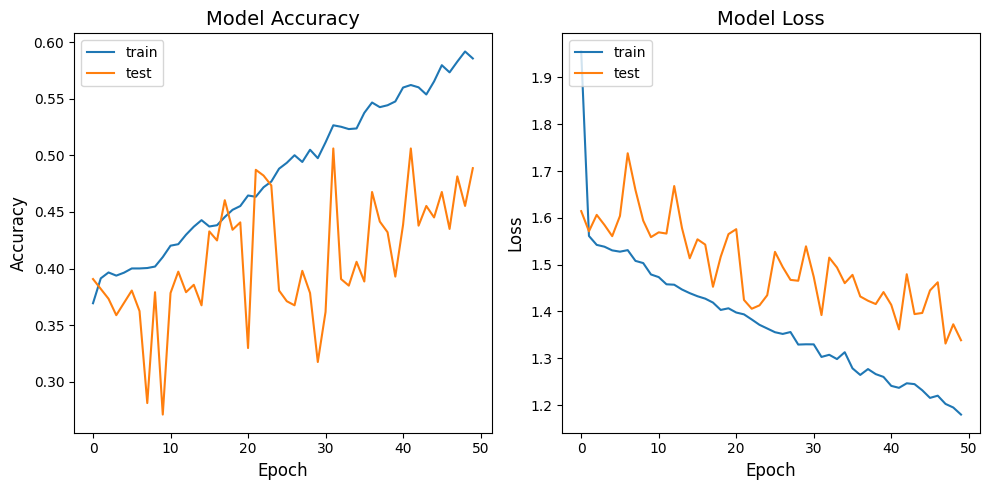

In [53]:
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot akurasi
ax1.plot(History_mfcc1.history['accuracy'], label='train')
ax1.plot(History_mfcc1.history['val_accuracy'], label='test')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(loc='upper left')

# Plot loss
ax2.plot(History_mfcc1.history['loss'], label='train')
ax2.plot(History_mfcc1.history['val_loss'], label='test')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.4279 - loss: 1.4693
n Val_Accuracy: 0.4887436330318451
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step
confusion matrix
[[ 91  12  38  14   7  56]
 [ 19  34  46  26  12  40]
 [ 18   6 248  12  17 178]
 [  0   3   4 172  10   1]
 [ 20   7   0  77  58  19]
 [ 11   5  40   4   2  70]]


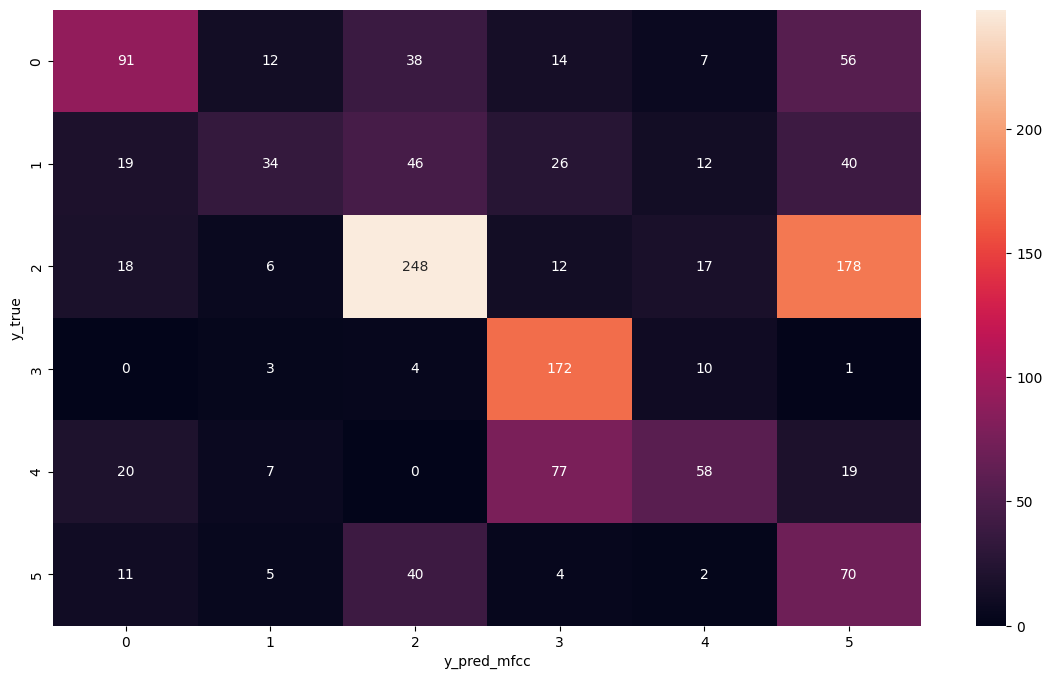

In [54]:
accuracy = model_mfcc2.evaluate(val_set_mfcc)
print('n', 'Val_Accuracy:', accuracy[1])
pred2 = model_mfcc2.predict(val_set_mfcc)
y_pred_mfcc = np.argmax(pred2, axis=1)
#y_true = np.argmax(pred2, axis=1)
print('confusion matrix')
print(confusion_matrix(val_set_mfcc.classes, y_pred_mfcc))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(val_set_mfcc.classes, y_pred_mfcc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred_mfcc")
plt.ylabel("y_true")
plt.show()

In [56]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set_mfcc1 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1163 images belonging to 6 classes.


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.3683 - loss: 1.8046
n Test_Accuracy:- 0.5107480883598328
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step
confusion matrix
[[ 34   5  43  27  42  21]
 [ 31  71   3  16  38  23]
 [ 53  27  83  26   3  36]
 [ 23   2  13 328   5  10]
 [  1  16   1  19  34  29]
 [  4   7  32   9   4  44]]


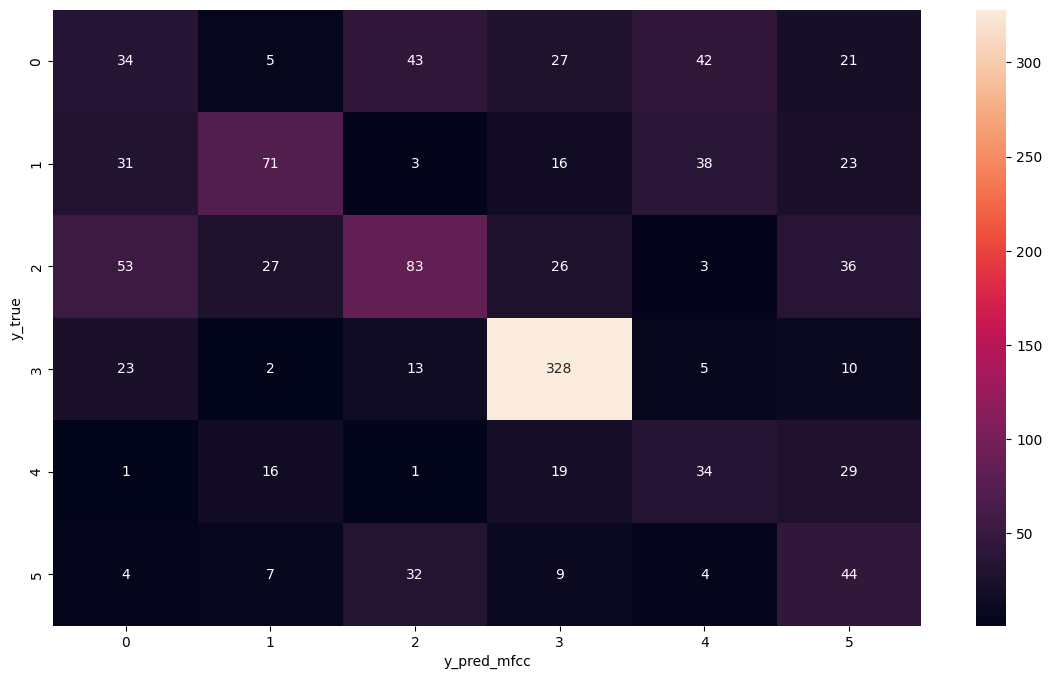

In [59]:
accuracy = model_mfcc2.evaluate(test_set_mfcc1)
print('n', 'Test_Accuracy:-', accuracy[1])
pred1 = model_mfcc2.predict(test_set_mfcc1)
y_pred_mfcc = np.argmax(pred1, axis=1)
#y_true = np.argmax(pred1, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set_mfcc1.classes, y_pred_mfcc))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set_mfcc1.classes, y_pred_mfcc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred_mfcc")
plt.ylabel("y_true")
plt.show()

In [61]:
# Save the model
model_save_path = '/kaggle/working/cnn_mfcc1.h5'  # Change this path as needed
model_mfcc2.save(model_save_path)

print(f'Model saved to {model_save_path}')

import pickle, os

os.makedirs("model_output", exist_ok = True)
pickle.dump(model_mfcc2, open("/kaggle/working/cnn_mfcc1.pkl", "wb"))

Model saved to /kaggle/working/cnn_mfcc1.h5
